In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk import word_tokenize
import re
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\Rasyid
[nltk_data]     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rasyid
[nltk_data]     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/Pandawara Group.csv')
df.head(25)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Oct 22 14:27:39 +0000 2023,1716098997268680975,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,0,1,0,0,in,321920183,1715775842142597434,yuanrizkyrmdhn,https://twitter.com/yuanrizkyrmdhn/status/1716...
1,Sun Oct 22 14:21:36 +0000 2023,1716097476980269479,mau jg dle ketemu pandawara di tallo,0,1,0,1,in,1643730553,1716097476980269479,4riwa,https://twitter.com/4riwa/status/1716097476980...
2,Sun Oct 22 13:57:52 +0000 2023,1716091502143865312,@txtfromjogja Wedi diresiki pandawara koyoke,0,0,0,0,in,586141219,1715911193507061817,bojonedenok,https://twitter.com/bojonedenok/status/1716091...
3,Sun Oct 22 13:57:30 +0000 2023,1716091410418716708,Pandawara grup bersihin kamar w dong,0,2,9,24,in,1390907628243472390,1716091410418716708,gypsydeiv,https://twitter.com/gypsydeiv/status/171609141...
4,Sun Oct 22 13:30:00 +0000 2023,1716084490312077626,Pandawara Group melakukan aksi bersih-bersih d...,0,1,2,22,in,69183155,1716084490312077626,detikcom,https://twitter.com/detikcom/status/1716084490...
5,Sun Oct 22 12:12:38 +0000 2023,1716065021283991608,RAMALAN ATAS KEHANCURAN DINASTI HASTINAPURA - ...,0,0,0,0,in,1679106908714864640,1716065021283991608,NobarSeries,https://twitter.com/NobarSeries/status/1716065...
6,Sun Oct 22 11:47:50 +0000 2023,1716058781107519906,@jawafess Butuh pandawara versi transportasi,0,0,1,0,in,2945334860,1716057023216021941,nitramikid,https://twitter.com/nitramikid/status/17160587...
7,Sun Oct 22 11:22:37 +0000 2023,1716052432588079523,@xDiamantee @merapi_uncover @KabarGunkid Udah ...,0,0,0,0,in,73687388,1715998112119148998,FabBagas,https://twitter.com/FabBagas/status/1716052432...
8,Sun Oct 22 11:11:23 +0000 2023,1716049607522984261,pandawara tolong bersihin hati orang yang isin...,0,0,0,0,in,2960409672,1716049607522984261,jenoleewj,https://twitter.com/jenoleewj/status/171604960...
9,Sun Oct 22 11:01:02 +0000 2023,1716047003342520344,pandawara tlong rapihkan pola hidup dan pikira...,2,1,25,77,in,1538919563940597761,1716047003342520344,mlvinsagara,https://twitter.com/mlvinsagara/status/1716047...


# **EDA (Exploratory Data Analysis)**

In [ ]:
df.shape

(999, 12)

In [ ]:
df.dtypes

created_at             object
id_str                 object
full_text              object
quote_count             int64
reply_count             int64
retweet_count           int64
favorite_count          int64
lang                   object
user_id_str            object
conversation_id_str    object
username               object
tweet_url              object
dtype: object

In [ ]:
df.columns

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')

In [ ]:
df.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [ ]:
df.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [ ]:
df.corr()

C:\Users\Rasyid andriansyah\AppData\Local\Temp\ipykernel_2024\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,quote_count,reply_count,retweet_count,favorite_count
quote_count,1.000000,0.779412,0.911756,0.934680
reply_count,0.779412,1.000000,0.457840,0.938027
retweet_count,0.911756,0.457840,1.000000,0.716941
favorite_count,0.934680,0.938027,0.716941,1.000000


C:\Users\Rasyid andriansyah\AppData\Local\Temp\ipykernel_2024\2852942427.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numeric_data = df.corr()


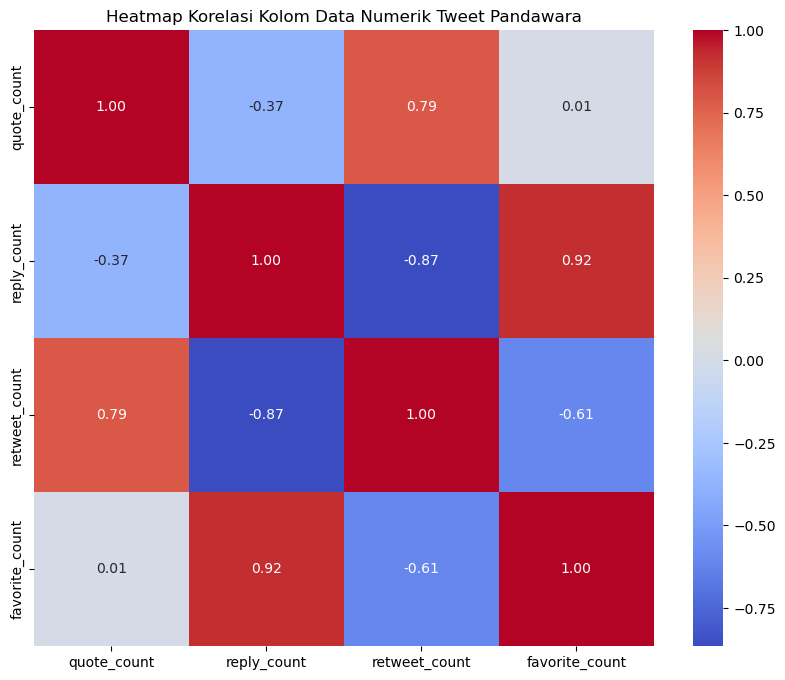

In [ ]:
numeric_data = df.corr()
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Kolom Data Numerik Tweet Pandawara')
plt.show()

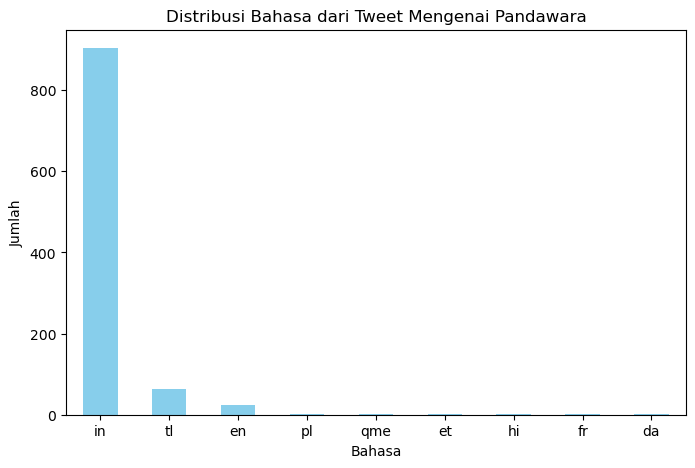

In [ ]:
lang_counts = df['lang'].value_counts()
plt.figure(figsize=(8, 5))
lang_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Bahasa dari Tweet Mengenai Pandawara')
plt.xlabel('Bahasa')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

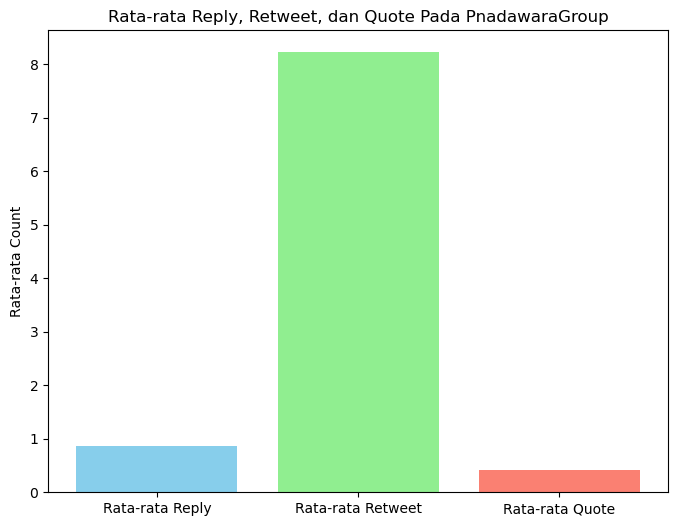

In [ ]:
avg_reply = df['reply_count'].mean()
avg_retweet = df['retweet_count'].mean()
avg_quote = df['quote_count'].mean()

data = [avg_reply, avg_retweet, avg_quote]
labels = ['Rata-rata Reply', 'Rata-rata Retweet', 'Rata-rata Quote']

plt.figure(figsize=(8, 6))
plt.bar(labels, data, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Rata-rata Reply, Retweet, dan Quote Pada PnadawaraGroup')
plt.ylabel('Rata-rata Count')

plt.show()

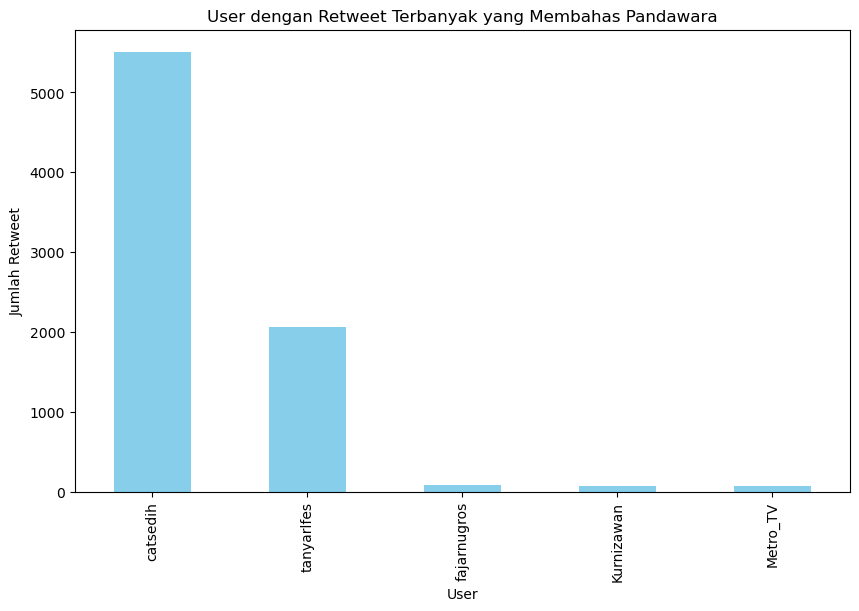

In [ ]:
review_retweet_counts = df.groupby('username')['retweet_count'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
review_retweet_counts.plot(kind='bar', color='skyblue')
plt.title('User dengan Retweet Terbanyak yang Membahas Pandawara')
plt.xlabel('User')
plt.ylabel('Jumlah Retweet')

plt.show()

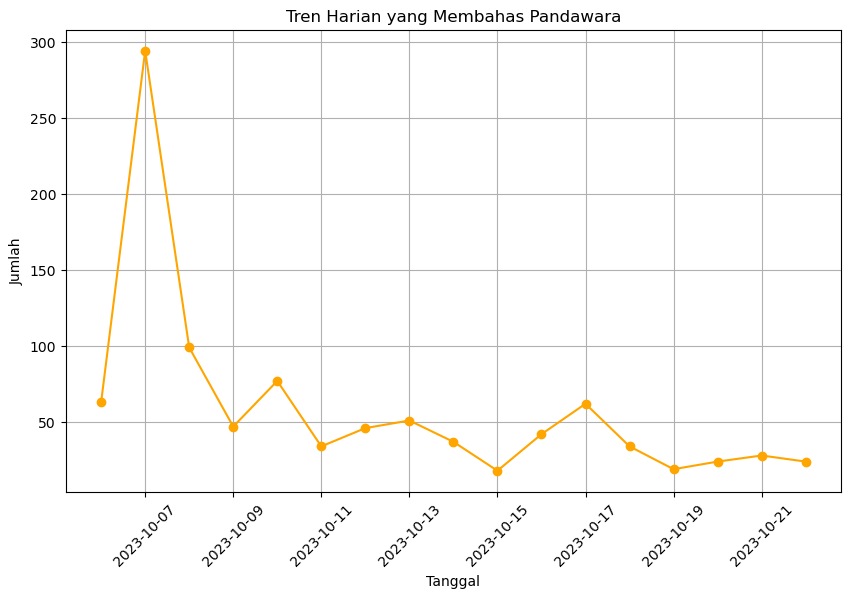

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
daily_count = df['date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
daily_count.plot(kind='line', marker='o', color='orange')
plt.title('Tren Harian yang Membahas Pandawara')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

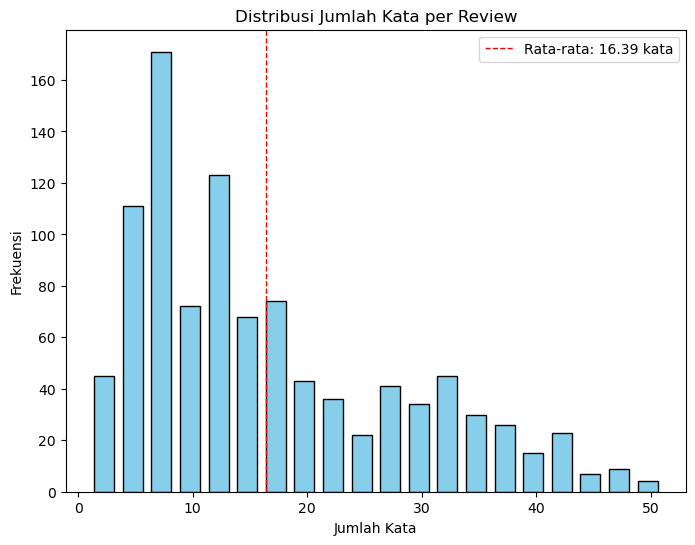

In [ ]:
df['word_count'] = df['full_text'].apply(lambda x: len(x.split()))

avg_word_count = df['word_count'].mean()

num_bins = 20
relative_width = 0.7

plt.figure(figsize=(8, 6))
plt.hist(df['word_count'], bins=num_bins, color='skyblue', edgecolor='black', rwidth=relative_width)
plt.title('Distribusi Jumlah Kata per Review')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.axvline(avg_word_count, color='red', linestyle='dashed', linewidth=1, label=f'Rata-rata: {avg_word_count:.2f} kata')
plt.legend()
plt.show()

# **Preprocessing**

In [ ]:
columns_to_remove = ['created_at', 'id_str', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url','date','word_count']
df= df.drop(columns=columns_to_remove)

In [ ]:
df.head(3)

,full_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...
1,mau jg dle ketemu pandawara di tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke


In [ ]:
df= df.rename(columns={"full_text": "text"})

In [ ]:
df.head(3)

,text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...
1,mau jg dle ketemu pandawara di tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke


In [ ]:
!pip install Sastrawi

In [ ]:
!pip install stanza

In [ ]:
import re
import nltk
nltk.download('all')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import stanza




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package non

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Rasyid
[nltk_data]    |     andriansyah\AppData\Roamin

In [ ]:
df.head(4)

,text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...
1,mau jg dle ketemu pandawara di tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke
3,Pandawara grup bersihin kamar w dong


In [ ]:
# Case Folding
df['processed_text'] = df['text'].apply(lambda x: x.lower())

In [ ]:
df.head(4)

,text,processed_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,@fiqinuraeni tumpukan sampah e wis diangkut pa...
1,mau jg dle ketemu pandawara di tallo,mau jg dle ketemu pandawara di tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke,@txtfromjogja wedi diresiki pandawara koyoke
3,Pandawara grup bersihin kamar w dong,pandawara grup bersihin kamar w dong


In [ ]:
# Remove links
df['processed_text'] = df['processed_text'].replace(to_replace=r'http[s]?://\S+', value='', regex=True)

df['processed_text'] = df['processed_text'].replace(to_replace='&amp', value='dan', regex=True)
df['processed_text'] = df['processed_text'].replace(to_replace='&lt', value='<', regex=True)
df['processed_text'] = df['processed_text'].replace(to_replace='&gt', value='>', regex=True)


In [ ]:
# Menyimpan DataFrame ke file CSV
df.to_csv('output2.csv', index=False)

In [ ]:
# Remove new line characters
df['processed_text'] = df['processed_text'].replace(to_replace=r'[\r\n]+', value=' ', regex=True)
df['processed_text'] = df['processed_text'].replace(to_replace=r'@\w+', value='', regex=True)
df['processed_text'] = df['processed_text'].replace(to_replace=r'#\w+', value='', regex=True)



In [ ]:
df.head(4)

,text,processed_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,tumpukan sampah e wis diangkut pandawara group
1,mau jg dle ketemu pandawara di tallo,mau jg dle ketemu pandawara di tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke,wedi diresiki pandawara koyoke
3,Pandawara grup bersihin kamar w dong,pandawara grup bersihin kamar w dong


In [ ]:
# Tokenizing using Stanza
nlp = stanza.Pipeline('id', processors='tokenize')
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([word.text for sent in nlp(x).sentences for word in sent.words]))



2023-11-27 10:37:49 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-11-27 10:37:50 WARNING: Language id package default expects mwt, which has been added
2023-11-27 10:37:50 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |

2023-11-27 10:37:50 INFO: Using device: cpu
2023-11-27 10:37:50 INFO: Loading: tokenize
2023-11-27 10:37:50 INFO: Loading: mwt
2023-11-27 10:37:50 INFO: Done loading processors!


In [ ]:
def tokenize_text(text):
    tokens = [word.text for sent in nlp(text).sentences for word in sent.words]
    print(f"Tokens: {tokens}")
    return ' '.join(tokens)

df['processed_text'] = df['processed_text'].apply(tokenize_text)

Tokens: ['tumpukan', 'sampah', 'e', 'wis', 'diangkut', 'pandawara', 'group']
Tokens: ['mau', 'jg', 'dle', 'ketemu', 'pandawara', 'di', 'tallo']
Tokens: ['wedi', 'diresiki', 'pandawara', 'koyoke']
Tokens: ['pandawara', 'grup', 'bersihin', 'kamar', 'w', 'dong']
Tokens: ['pandawara', 'group', 'melakukan', 'aksi', 'bersih-bersih', 'di', 'kampung', 'nelayan', ',', 'kota', 'makassar', 'hari', 'ini', '.', 'aksi', 'ini', 'bekerja', 'sama', 'dengan', 'olymplast', 'dan', 'world', 'cleanup', 'day', 'sulsel', '.', '>', '>', 'foto', ':', 'sahrul', 'alim']
Tokens: ['ramalan', 'atas', 'kehancuran', 'dinasti', 'hastinapura', '-', 'alur', 'film', 'india', '.', 'film']
Tokens: ['butuh', 'pandawara', 'versi', 'transportasi']
Tokens: ['udah', 'ada', 'di', 'yutub', ',', 'colab', 'sama', 'pandawara', '.']
Tokens: ['pandawara', 'tolong', 'bersihin', 'hati', 'orang', 'yang', 'isi', 'nya', 'dengki', 'dan', 'iri', 'sama', 'pencapaian', 'orang', 'lain']
Tokens: ['pandawara', 'tlong', 'rapihkan', 'pola', 'hidup',

Tokens: ['pandawara', 'kenapa', 'ga', 'dari', 'dulu', 'aja', 'muncul', 'yak']
Tokens: ['pandawara', 'angkat', 'tangan']
Tokens: ['pandawara', 'tolong', 'bersihin', 'hati', 'gua', 'yg', 'suka', 'sama', 'dia']
Tokens: ['andaikan', 'pandawara', 'sudah', 'ada']
Tokens: ['nay', ',', 'ada', 'pandawara']
Tokens: ['andaikan', 'pandawara', 'ada', 'kala', 'itu', 'mungkin', 'akan', 'lebih', 'efisien', 'membersihkan', 'gorong', 'gorong', 'disana']
Tokens: ['celukno', 'pandawara']
Tokens: ['pandawara', 'tolong', 'bersihin', 'isi', 'kepala', 'ku', 'yg', 'tiap', 'malem', 'pengin', 'mark', 'lee']
Tokens: ['pandawara', 'tolong', 'bersihin', 'hati', 'akgae', 'yang', 'isi', 'nya', 'dengki', 'dan', 'iri', 'sama', 'pencapaian', 'member', 'lain', 'selain', 'biasnya']
Tokens: ['tolong', 'bgt', 'nih', 'mas-mas', 'pandawara', '🙏']
Tokens: ['kira', 'kira', 'pandawara', 'bisa', 'bantu', 'bersihin', 'pikiran', 'aku', 'tentang', 'kamu', 'ga', 'ya']
Tokens: ['andai', 'pandawara', 'udah', 'ada', 'waktu', 'itu']
Toke

Tokens: ['tiktok', 'awards', 'indonesia', '2023', 'sukses', 'digelar', '!', 'nggak', 'nyangka', 'pandawara', 'group', 'menang', '3', 'awards', ',', 'salah', 'satu', 'nya', 'sebagai', 'creator', 'of', 'the', 'year', '.']
Tokens: ['pandawara', 'group', 'dapat', 'tiga', 'piala', 'di', 'tiktok', 'awards', ':', 'kami', 'dedikasikan', 'untuk', 'pejuang', 'lingkungan']
Tokens: ['bismillah', 'dpet', 'cowo', 'kek', 'gilang', 'pandawara', 'klo', 'ngga', ',', 'dpet', 'gilang', 'nya', 'yang', 'asli', 'juga', 'saya', 'ikhlas']
Tokens: ['gilang', 'pandawara', 'cakep', 'ya']
Tokens: ['pandawara', 'group', 'managed', 'to', 'bring', 'home', 'three', 'awards', 'at', 'the', 'tiktok', 'awards', 'indonesia', '2023', '.', 'pandawara', 'group', 'received', 'awards', 'in', 'three', 'different', 'categories', ',', 'namely', 'creator', 'of', 'the', 'year', ',', 'rising', 'star', 'of', 'the', 'year', ',', 'and', 'change', 'makers', 'of', 'the', 'year', '.']
Tokens: ['diliat2', 'muka', 'gw', 'mirip', 'gilang', 'p

Tokens: ['nah', 'kan', 'kemaren', 'pandawara', 'kan', 'niat', 'nya', 'mau', 'bersihin', 'tu', 'pantai', 'ya', 'seharus', 'nya', 'di', 'support', ',', 'nah', 'elu', 'pak', 'sekarang', 'mikirin', ',', 'dari', 'mana', 'tu', 'sampah', 'sampe', 'bisa', 'sekotor', 'itu', ',', 'malah', 'kaget', '.', 'padahal', 'kalo', 'pemimpin', 'kaget', 'bakal', 'buat', 'panik', 'bawahan', 'loh']
Tokens: ['km', 'harus', 'melengkapi', 'nya', 'dgn', 'cara', 'km', 'menjadi', 'pandawara', 'untuk', 'mulut', 'nya', '.']
Tokens: ['sampah', 'di', 'pantai', 'teluk', ',', 'pandeglang', ',', 'banten', ',', 'pernah', 'dibersihkan', 'secara', 'masal', 'oleh', 'warga', 'yang', 'diinisiasi', 'grup', 'pandawara', 'mei', '2023', '.']
Tokens: ['di', 'buang', 'nanti', 'jadi', 'kek', 'pantai', 'kemaren', 'tuh', 'yang', 'kata', 'nya', 'pantai', 'terkotor', 'no', '4', 'menurut', 'pandawara', '🗿🗿']
Tokens: ['pandawara', ',', 'ikiloh', 'onok', 'sampah', 'orep']
Tokens: ['pandawara']
Tokens: ['tolong', 'pandawara', 'bersihkan', 'ib

Tokens: ['pandawara', 'masuk', 'sistem', 'juga', 'mungkinin', 'bakal', 'bersih', 'si', ',', 'yg', 'ada', 'sebelum', 'jadi', 'udah', 'didepak', 'duluan', 'sm', 'kecoa2', 'sistem', 'disitu']
Tokens: ['mana', 'pandawara', '.', '..hayoo', 'kalian', 'turun', 'lagi', '.', '.', '.', '😂']
Tokens: ['pandawara', 'keren', ',', 'semoga', 'sdm', 'di', 'sama', 'tidak', 'merusak', 'lagi', 'yaa']
Tokens: ['pandawara', 'grup', 'isi', 'konten', 'nya', 'sampah']
Tokens: ['mentri', 'lhk', 'gak', 'melulu', 'soal', 'sampah', 'mb', '.', 'memang', 'saya', 'akui', 'pandawara', 'sendiri', 'sangat', 'bagus', 'dan', 'sangat', 'concern', 'terhadap', 'sampah', '.', 'tapi', 'kan', 'di', 'lhk', 'ada', 'pencemaran', 'air', 'udara', 'tanah', 'limbah', 'b3', ',', 'soal', 'kehutanan', 'konservasi', 'hewan', 'lingkungan', 'dan', 'sejenisnya', '.', 'banyak', 'bgt', 'mb']
Tokens: ['terima', 'kasih', 'pandawara', 'group', '.', 'berkat', 'kebaikan', 'kalian', 'lah', 'akhirnya', 'pemerintah', 'setempat', 'sampai', 'mau', 'berg

Tokens: ['takut', 'bgt', 'kalo', 'tiba-tiba', 'pandawara', 'group', 'nemuin', 'w', 'buat', 'beresin', 'hidup', 'w', 'yg', 'berantakan']
Tokens: ['yen', 'pandawara', 'kesitu', ',', 'kira²', 'yg', 'punya', 'altar', 'tersinggung', 'gk', 'ya', '?', 'wkwk']
Tokens: ['nggak', 'terima', 'disebut', 'pantai', 'terkotor', ',', 'ketua', 'kartar', 'dan', 'kades', 'sarangwayang', 'ancam', 'akan', 'tuntut', 'pandawara', '.']
Tokens: ['seperti', 'nya', 'bupati', 'nya', 'yang', 'kurang', 'informasi', '.', 'pandawara', 'justru', 'yang', 'kasih', 'solusi', ',', 'udah', 'beberapa', 'pantai', 'mereka', 'bersihkan', '.']
Tokens: ['plastic', 'sugary', 'dr', 'pandawara', 'tu', '😆', 'rata', 'kluarga', 'kardashian', 'oplas', 'smua', 'kali', '😂', '"']
Tokens: ['pandawara', 'di', 'masa', 'depan', 'mungkin', 'bakal', 'dijegal', 'mafia', '.', 'terlalu', 'keren', '👏']
Tokens: ['jujur', 'sih', 'saya', 'sebagai', 'orang', 'sukabumi', 'malu', 'padahal', 'jelas', 'jelas', 'pandawara', 'itu', 'mengingatkan', 'mengajak',

Tokens: ['pandawara', 'group', 'membersikan', 'pantai', 'loji', ',', 'sukabumi', 'karena', 'sangat', 'kotor', 'akibat', 'tumpukan', 'sampah']
Tokens: ['pandawara', 'grup', 'mana', 'ni', 'suara', 'nya']
Tokens: ['halo', 'pandawara', 'tolong', 'ini', 'dibersihkan']
Tokens: ['pandawara', 'group', ':', 'ga', 'gini', 'cara', 'nya', 'sobat']
Tokens: ['bupati', 'sukabumi', 'kayak', 'nya', ',', 'masuk', 'jadi', 'bupati', 'pakai', 'ordal', 'deh', 'maka', 'nya', 'gak', 'punya', 'otak', ',', 'yang', 'harus', 'nya', 'cari', 'solusi', 'ya', 'lu', 'jangan', 'malah', 'pandawara', 'kan', 'mereka', 'ngebantu', 'agar', 'pantai', 'lu', 'bersih', ',', 'maka', 'nya', 'jadi', 'bupati', 'jangan', 'makan', 'tidur', 'makan', 'tidur', ',', 'dan', 'korupsi', 'yok', 'otak', 'juga', 'di', 'pakai', '👍', '🥰']
Tokens: ['loh', 'itu', 'kan', 'konten', 'nya', 'juga', 'sebagai', 'salah', 'satu', 'cara', 'biar', 'orang²', 'pada', 'tergerak', ',', 'tapi', 'kok', 'yg', 'disuruh', 'cari', 'solusi', 'malah', 'pandawara', 'kan

Tokens: ['terimakasih', 'pandawara', ',', 'kau', 'telah', 'berjiwa', 'besar']
Tokens: ['itu', 'kl', 'ga', 'dikontenin', 'pandawara', 'mana', 'ada', 'tu', 'org', 'gerak', 'buat', 'bersihin', 'kocakkkk']
Tokens: ['pandawara', 'wes', 'ngerti', 'rung', '?']
Tokens: ['nunggu', 'pandawara', 'ngasih', 'peringkat', 'dulu', ',', 'baru', 'gerak', 'tu', 'membersikan']
Tokens: ['pandawara', 'tolong', 'ke', 'surabaya', ',', 'ini', 'ada', 'orang', 'tua', 'yg', 'kaya', 'sampah', '.']
Tokens: ['gapapa', ',', 'penting', 'lulus', '.', '.', 'bunga', 'bucket', 'gitu', 'juga', 'ntar', 'jadi', 'sampah', ',', 'nambah', 'pr', 'pandawara']
Tokens: ['nolak', 'pandawara', ',', 'dan', 'bersih-bersih', 'duluan', ':', ')']
Tokens: ['nunggu', 'di', 'viralin', 'grup', 'pandawara', 'ya', '?']
Tokens: ['kayak', 'aksi', 'pandawara', 'gitu', 'bisa', 'ga', 'sih', 'klo', 'disebut', 'voluntourism', '?', 'aku', 'suka', 'matkul', 'voluntourism', ',', 'karena', 'itu', 'kegiata', 'nya', 'bagus', 'jd', 'voluntir', 'sekaligus', '

Tokens: ['dan', 'ada', 'yang', 'nyuruh', 'pandawara', 'jangan', 'cuman', 'ngonten', '.', 'noh', 'liat', 'efek', 'ngonten', 'aja', 'bisa', 'bikin', 'efek', 'positif', 'kaya', 'gini', '.']
Tokens: ['yang', 'dilakukan', 'pandawara', 'ini', 'bagus', 'dan', 'terpuji', '.', 'walau', 'pun', 'kalau', 'dibilang', 'demi', 'konten', 'ya', 'bener', 'juga', '.', 'kenapa', '?', 'karena', 'tidak', 'kerjasama', 'dengan', 'warlok', 'untuk', 'keberlanjutan', 'nya', '.', 'mereka', 'mengawali', 'oke', ',', 'tapi', 'harus', 'ada', 'yang', 'melanjutkan', '.']
Tokens: ['lhaaaaa', 'kocakkkk', ',', 'ngapa', 'jadi', 'disuruh', 'cari', 'solusi', '?', 'kalo', 'pandawara', 'yg', 'cari', 'solusi', 'terus', 'belio', 'ini', 'yang', 'digaji', 'negara', 'ngapain', '?', '😩']
Tokens: ['yg', 'pasti', 'pandawara', 'tidak', 'berafili', 'ke', 'kubu', 'politik', 'tertentu', 'dan', 'mereka', 'tdk', 'ingin', 'cari', 'musuh', 'dlm', 'perjalanan', 'program', 'nya', '.', 'jadi', 'tdk', 'heran', 'klo', 'mrk', 'mudah', 'meminta', 'm

Tokens: ['solusi', 'nya', 'itu', 'ya', 'kalian', 'bapak', 'bapak', 'ibu', 'ibu', 'pejabat', 'daerah', 'setempat', '.', '.', 'pandawara', 'masih', 'bagus', 'nyentil', 'kalian', 'buat', 'bersih', 'bersih', 'sampah', 'di', 'sana', '.', '.', 'setelah', 'itu', 'coba', 'dipikirkan', 'pejabat', 'daerah', 'setempat', 'kira', 'kira', 'setelah', 'bersih', ',', 'solusi', 'apa', 'yg', 'bagus', 'biar', 'gak', 'nimbun', 'lagi', 'sampah', 'nya', '🤧']
Tokens: ['suruh', 'cari', 'solusi', 'tuh', 'pandawara', 'biar', 'kalau', 'korupsi', 'bupati', 'nya', 'yang', 'atur']
Tokens: ['bukan', 'nya', 'mengajak', 'element', 'masyarakat', 'dan', 'membersihan', 'pantai', 'sudah', 'termasuk', 'salah', 'satu', 'solusi', '?', 'heran', 'deh', 'bilang', 'aja', 'ganau', 'tersaingi', 'sama', 'pandawara', 'huhuuu']
Tokens: ['emng', 'yg', 'paling', 'bener', 'pandawara', 'collab', 'sm', 'org', 'luar', 'negeri', 'aja', 'dinegara', 'sendiri', 'malah', 'disinggung', 'terus', 'anjir']
Tokens: ['demi', 'konten', 'tapi', 'dapat',

Tokens: ['a', '<SOS>a', 'pandawara', 'kan', 'sdh', 'menggerakan', 'masyarakat', 'untuk', 'bantu', 'dia', 'bersih2', '.', 'itu', 'udh', 'solusi', 'bagus', 'gimana', 'kedepan', 'nya', 'aja', 'setelah', 'bersih', 'harus', 'dijaga', 'lg', 'kebersihan', 'nya', 'jgn', 'diperbanyak', 'lg', 'sampah', 'nya', '.', 'tgs', 'bupati', 'jgn', 'komen', 'doang', 'kasi', 'solusi', 'jg', 'dong', 'wkwk']
Tokens: ['keren', '!', 'pandawara', 'sukses', 'jd', 'influencer', '👏🏻']
Tokens: ['bupati', 'goblok', ',', 'itu', 'solusi', 'udah', 'dikasi', 'tunjuk', 'sama', 'pandawara', 'cara', 'menjaga', 'kebersihan', 'yg', 'paling', 'sederhana', '.', 'gotong', 'royong', 'mulung', 'sampah', '.']
Tokens: ['berarti', 'pandawara', 'group', 'emang', 'udah', 'sukses', 'jadi', 'influencer', '🥺👍🏼']
Tokens: ['klarifikasi', 'sih', '.', '.', 'tp', 'kenapa', 'sehabis', 'kunjungan', 'pandawara', 'langsung', 'ada', 'tindakan', 'bersih-bersih', '?', 'sblm', 'nya', 'kemana', '?', 'bentar', 'ada', 'tukang', 'baso', '.', '.', '.']
Tok

Tokens: ['lo', 'kan', 'bupati', 'nya', ',', 'lo', 'lah', 'yang', 'nyari', 'solusi', 'sendiri', ',', 'kalo', 'suruh', 'pandawara', 'atau', 'masyarakat', 'sekitar', ',', 'trus', 'kerja', 'lo', 'apa', '?']
Tokens: ['pandawara', 'versi', 'kemasan', 'saset🥺', '🫶']
Tokens: ['berarti', 'pandawara', 'beneran', 'berhasil', 'jadi', 'influencer', 'ya', '.', 'they', 'influence', 'ppl', 'to', 'do', 'the', 'same', 'good', 'things', '👍']
Tokens: ['bupati', 'nya', 'digantiin', 'pandawara', 'aja', 'sekalian', 'ini']
Tokens: ['iya', 'nih', 'pandawara', 'salah', 'besar', ',', 'mau', 'bersih²', 'sampah', 'kok', 'ga', 'pake', 'kata', 'sambutan', 'kepala', 'desa']
Tokens: ['karna', 'konten', 'nya', 'bukti', 'kalau', 'pemimpin', 'daerah', 'ga', 'becus', 'nanganin', 'apa', 'pun', '.', 'jadi', 'mereka', 'malu', ',', 'merasa', 'dihina', 'jadi', 'ngehina', 'balek', 'doang', '🤙', 'coba', 'pandawara', 'gak', 'muay', 'konten', ',', 'mana', 'beliau', 'nih', 'gerak', 'bersih', 'bersih', '.']
Tokens: ['apa', 'yang', '

Tokens: ['menurut', 'ku', 'juga', 'semakin', 'banyak', 'yang', 'meniru', 'semakin', 'baik', ',', 'berarti', 'pandawara', 'berhasil', 'nge', 'influence', 'banyak', 'orang', 'buat', 'menjaga', 'kebersihan', 'lingkungan', ',', 'semoga', 'makin', 'banyak', 'yang', 'terinspirasi', 'ketimbang', 'bikin', 'tren', 'tik', 'tok', 'nggak', 'jelas', 'dan', 'merugikan', 'orang', 'lain', '👍']
Tokens: ['pada', 'dasar', 'nya', ',', 'b*pati', ',', 'p*rangkat', 'd*sa', 'dan', 'karang', 'taruna', 'keur', 'rada', 'haus', ',', 'haus', 'pupujieun', '.', 'padahal', 'ditolak', ',', 'mau', 'dituntut', 'si', 'pandawara', ',', 'giliran', 'pj', 'gub', 'negur', ',', 'dibuat', 'seolah', 'bermediasi', ',', 'klarifikasi', 'dan', 'semua', 'baik2', 'saja', '.', 'ahhahaahhaahaha', 'teu', 'aneh', '.']
Tokens: ['kl', 'kata', 'aku', 'harus', 'nya', 'km', 'mikir', 'sih', 'bupati', 'sukabumi', '.', 'itu', 'kan', 'pandawara', 'jg', 'bertindak', 'nya', 'pake', 'solusi', 'mau', 'bersihin', 'pantai', ',', 'kenapa', 'di', 'konteni

Tokens: ['angga', 'titans', 'hobi', 'i', 'want', 'that', 'out', 'now', 'txt', 'freefall', 'tracklist', 'yedam', 'mc', 'lee', 'heejin', 'jaemin', 'you', 'did', 'well', 'mntap', 'haechan', 'semarang', 'lee', 'taeyong', 'junghwan', 'jeon', 'jungkook', 'darling', 'na', 'pd', 'bada', 'pandawara', 'jennie', 'hanni', 'megumi', 'you', 'dan', 'me', 'out', 'now', 'gento', 'laura', 'basuki', 'drake', 'jinyoung', 'tzuyu', 'lay', 'day']
Tokens: ['pandawara', 'piwarang', 'kadi', 'nya', 'weh', 'daripada', 'riweuh', 'di', 'pantai', 'kab', 'sukabumi', 'mah', 'tos', '2', '×', 'klarifikasi', 'weh', 'hayoh', '.']
Tokens: ['para', 'pemuda', 'desa', 'dan', 'perangkat', 'nya', 'sedang', 'menggunakan', 'power', ',', 'liat', 'aja', 'komposisi', 'nya', 'lebih', 'banyak', 'siapa', '.', 'jelas', 'pandawara', 'sedang', 'di', 'posisi', 'di', 'bawah', 'tekanan', '.', 'kalo', 'gak', 'ngikutin', 'kemauan', 'mereka', '?', 'you', 'know', 'lah', 'bakal', 'gimana', 'cerita', 'nya']
Tokens: ['guru', 'jessica', 'jumat', 'pa

Tokens: ['lah', 'kok', 'ngatur', '.', 'lah', 'kan', 'nyari', 'solusi', 'tugas', 'bapak', '.', 'lah', 'kan', 'bapak', 'jg', 'lebih', 'punya', 'power', '.', 'lah', 'kan', 'ini', 'pandawara', 'pun', 'udah', 'ngasi', 'solusi', 'yg', 'bisa', 'mereka', 'lakukan', '.', 'kalo', 'minta', 'rakyat', 'juga', 'yang', 'edukasi', ',', 'rakyat', 'juga', 'yang', 'repot2', 'mending', 'tukeran', 'posisi', 'aja', 'pak', '.', 'turun', 'sini', 'jadi', 'rakyat', 'jelata', '.']
Tokens: ['kalo', 'gamau', 'kotorin', 'tangan', 'kalo', 'bisa', 'kasih', 'asset', 'support', 'lah', 'buat', 'pandawara', 'itu', 'juga', 'cukup']
Tokens: ['lucu', 'bgt', ',', 'salah', 'pak', '.', 'harus', 'nya', 'mah', 'kalian', 'yg', 'cari', 'solusi', ',', 'bikin', 'regulasi', 'yg', 'beneran', 'ngikat', 'semua', 'pihak', '.', 'kehadiran', 'pandawara', 'jadi', 'bukti', 'kerja', 'kalian', 'ga', 'tepat', 'sasaran', ',', 'eh', 'ada', 'kerja', 'nya', 'ya', '(', '?', ')']
Tokens: ['ohh', 'jadi', 'pandawara', 'nya', 'disuruh', 'nyari', 'solusi

In [ ]:
df.head(10)

,text,processed_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,tumpukan sampah e wis diangkut pandawara group
1,mau jg dle ketemu pandawara di tallo,mau jg dle ketemu pandawara di tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke,wedi diresiki pandawara koyoke
3,Pandawara grup bersihin kamar w dong,pandawara grup bersihin kamar w dong
4,Pandawara Group melakukan aksi bersih-bersih d...,pandawara group melakukan aksi bersih-bersih d...
5,RAMALAN ATAS KEHANCURAN DINASTI HASTINAPURA - ...,ramalan atas kehancuran dinasti hastinapura - ...
6,@jawafess Butuh pandawara versi transportasi,butuh pandawara versi transportasi
7,@xDiamantee @merapi_uncover @KabarGunkid Udah ...,"udah ada di yutub , colab sama pandawara ."
8,pandawara tolong bersihin hati orang yang isin...,pandawara tolong bersihin hati orang yang isi ...
9,pandawara tlong rapihkan pola hidup dan pikira...,pandawara tlong rapihkan pola hidup dan pikira...


In [ ]:
# # Stopwords Removal using Sastrawi
# stopword_factory = StopWordRemoverFactory()
# stopword = stopword_factory.create_stop_word_remover()
# df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(stopword.remove(x).split()))



In [ ]:
# Daftar stopword kustom sesuai keinginan
custom_stopwords = ['pandawara', 'nya', 'aja', 'tuh', 'sih', 'lah', 'pak', 'pandawara group', 'gilang', 'jadi', 'group'
                    , 'sama' ,'kan']

# Stopwords Removal using Sastrawi
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()

# Hapus stopword (Sastrawi + kustom) dan terapkan pada kolom 'processed_text'
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join
                                                  (word for word in stopword.remove(x).split() if word not in custom_stopwords))


In [ ]:
df.head(10)

,text,processed_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,tumpukan sampah e wis diangkut
1,mau jg dle ketemu pandawara di tallo,mau jg dle ketemu tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke,wedi diresiki koyoke
3,Pandawara grup bersihin kamar w dong,grup bersihin kamar w dong
4,Pandawara Group melakukan aksi bersih-bersih d...,"melakukan aksi bersih-bersih kampung nelayan ,..."
5,RAMALAN ATAS KEHANCURAN DINASTI HASTINAPURA - ...,ramalan atas kehancuran dinasti hastinapura - ...
6,@jawafess Butuh pandawara versi transportasi,butuh versi transportasi
7,@xDiamantee @merapi_uncover @KabarGunkid Udah ...,"udah di yutub , colab ."
8,pandawara tolong bersihin hati orang yang isin...,bersihin hati orang isi dengki iri pencapaian ...
9,pandawara tlong rapihkan pola hidup dan pikira...,tlong rapihkan pola hidup pikiran ak plizzz


In [ ]:
# Remove words with length less than 3
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))



In [ ]:
df.head(10)

,text,processed_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,tumpukan sampah wis diangkut
1,mau jg dle ketemu pandawara di tallo,mau dle ketemu tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke,wedi diresiki koyoke
3,Pandawara grup bersihin kamar w dong,grup bersihin kamar dong
4,Pandawara Group melakukan aksi bersih-bersih d...,melakukan aksi bersih-bersih kampung nelayan k...
5,RAMALAN ATAS KEHANCURAN DINASTI HASTINAPURA - ...,ramalan atas kehancuran dinasti hastinapura al...
6,@jawafess Butuh pandawara versi transportasi,butuh versi transportasi
7,@xDiamantee @merapi_uncover @KabarGunkid Udah ...,udah yutub colab
8,pandawara tolong bersihin hati orang yang isin...,bersihin hati orang isi dengki iri pencapaian ...
9,pandawara tlong rapihkan pola hidup dan pikira...,tlong rapihkan pola hidup pikiran plizzz


In [ ]:
# Stemming using Sastrawi
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Lemmatization using WordNet Bahasa Indonesia (WBI)
lemmatizer = WordNetLemmatizer()
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, wordnet.VERB) for word in x.split()]))

In [ ]:
df.tail(10)

,text,processed_text
989,@tanyarlfes Kalo ga dikontenin pandawara mana ...,kalo dikontenin mana bakal gerak bupati buat b...
990,"@tanyarlfes Pandawara suruh cari solusi, bupat...",suruh cari solusi bupati ngapain
991,Buat bilang: Pandawara Jangan Hanya Cari Konte...,buat bilang jangan cari konten juga solusi pad...
992,@devaihsan13 @Arie_Kriting Dih mana ada konten...,dih mana konten sampah justru konten lebih bai...
993,@txtdarisukabumi ????? Pandawara solusinya pan...,solusi pantai bersih kalo kotor masyarakat jorok
994,"@miiikuumi Pandawara tu maunya sekali kelar, s...",mau sekali kelar kades mau cicil biar duit terus
995,@tanyarlfes lah lu harusnya yg mikir solusinya...,mikir solusi sbgai pmrnth kocak udh syukur nga...
996,Yang sempat rame di perbincangkan🤔 Salah satu ...,sempat rame bincang salah satu alas transparan...
997,Dipicu video TikTok 5 pemuda menyoroti pantai ...,picu video tiktok pemuda sorot pantai mereka s...
998,@txtdarisukabumi pandawara salahnya dimana sih...,salah apa konten terlalu sarkas buat pemda


In [ ]:
df[['text', 'processed_text']]

,text,processed_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,tumpu sampah wis angkut
1,mau jg dle ketemu pandawara di tallo,mau dle ketemu tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke,wedi resik koyoke
3,Pandawara grup bersihin kamar w dong,grup bersihin kamar dong
4,Pandawara Group melakukan aksi bersih-bersih d...,laku aksi bersih kampung nelayan kota makassar...
...,...,...
994,"@miiikuumi Pandawara tu maunya sekali kelar, s...",mau sekali kelar kades mau cicil biar duit terus
995,@tanyarlfes lah lu harusnya yg mikir solusinya...,mikir solusi sbgai pmrnth kocak udh syukur nga...
996,Yang sempat rame di perbincangkan🤔 Salah satu ...,sempat rame bincang salah satu alas transparan...
997,Dipicu video TikTok 5 pemuda menyoroti pantai ...,picu video tiktok pemuda sorot pantai mereka s...


In [ ]:
df.head(10)

,text,processed_text
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,tumpu sampah wis angkut
1,mau jg dle ketemu pandawara di tallo,mau dle ketemu tallo
2,@txtfromjogja Wedi diresiki pandawara koyoke,wedi resik koyoke
3,Pandawara grup bersihin kamar w dong,grup bersihin kamar dong
4,Pandawara Group melakukan aksi bersih-bersih d...,laku aksi bersih kampung nelayan kota makassar...
5,RAMALAN ATAS KEHANCURAN DINASTI HASTINAPURA - ...,ramal atas hancur dinasti hastinapura alur fil...
6,@jawafess Butuh pandawara versi transportasi,butuh versi transportasi
7,@xDiamantee @merapi_uncover @KabarGunkid Udah ...,udah yutub colab
8,pandawara tolong bersihin hati orang yang isin...,bersihin hati orang isi dengki iri capai orang
9,pandawara tlong rapihkan pola hidup dan pikira...,tlong rapihkan pola hidup pikir plizzz


# **Clustering label**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

C:\Users\Rasyid andriansyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
labels = kmeans.labels_

In [ ]:
df['cluster'] = labels
df

,text,processed_text,cluster
0,@Fiqinuraeni tumpukan sampah e wis diangkut pa...,tumpu sampah wis angkut,0
1,mau jg dle ketemu pandawara di tallo,mau dle ketemu tallo,0
2,@txtfromjogja Wedi diresiki pandawara koyoke,wedi resik koyoke,0
3,Pandawara grup bersihin kamar w dong,grup bersihin kamar dong,0
4,Pandawara Group melakukan aksi bersih-bersih d...,laku aksi bersih kampung nelayan kota makassar...,0
...,...,...,...
994,"@miiikuumi Pandawara tu maunya sekali kelar, s...",mau sekali kelar kades mau cicil biar duit terus,0
995,@tanyarlfes lah lu harusnya yg mikir solusinya...,mikir solusi sbgai pmrnth kocak udh syukur nga...,1
996,Yang sempat rame di perbincangkan🤔 Salah satu ...,sempat rame bincang salah satu alas transparan...,0
997,Dipicu video TikTok 5 pemuda menyoroti pantai ...,picu video tiktok pemuda sorot pantai mereka s...,0


In [ ]:
df['cluster'].value_counts()

0    872
1    127
Name: cluster, dtype: int64

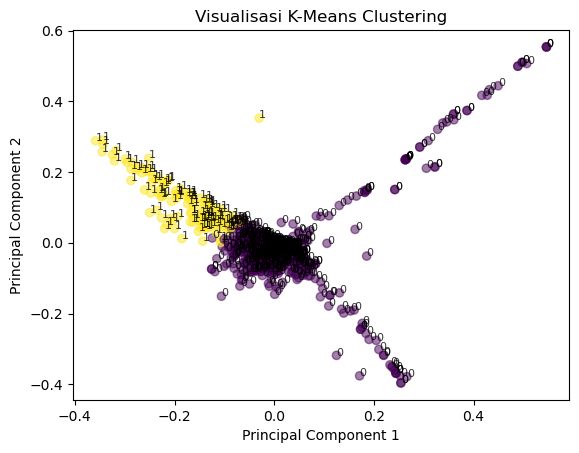

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

df['cluster'] = labels

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Visualisasi K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(df['cluster']):
    plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=8, alpha=0.8)

plt.show()


In [ ]:
tweets = {
    'Tweet': df['processed_text'].tolist(),
    'Sentimen': df['cluster'].tolist(),
}

frame = pd.DataFrame(tweets)
frame

,Tweet,Sentimen
0,tumpu sampah wis angkut,0
1,mau dle ketemu tallo,0
2,wedi resik koyoke,0
3,grup bersihin kamar dong,0
4,laku aksi bersih kampung nelayan kota makassar...,0
...,...,...
994,mau sekali kelar kades mau cicil biar duit terus,0
995,mikir solusi sbgai pmrnth kocak udh syukur nga...,1
996,sempat rame bincang salah satu alas transparan...,0
997,picu video tiktok pemuda sorot pantai mereka s...,0


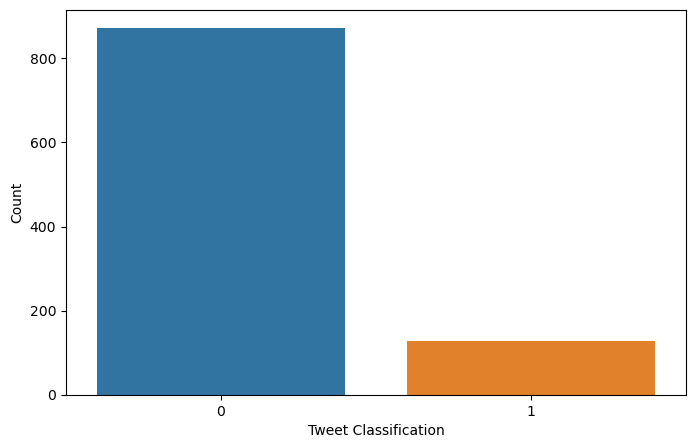

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sentimen', data=frame)
plt.xlabel('Tweet Classification')
plt.ylabel('Count')
plt.show()

In [ ]:
X = frame['Tweet']
y = frame['Sentimen']

In [ ]:
oversampler = RandomOverSampler(random_state=0)

In [ ]:
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.flatten())
X_test_tfidf = tfidf_vectorizer.transform(X_test.flatten())

# **Modelling Naive Bayes**

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.81       184
           1       0.73      1.00      0.85       165

    accuracy                           0.83       349
   macro avg       0.87      0.84      0.83       349
weighted avg       0.87      0.83      0.82       349



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search_nb = GridSearchCV(naive_bayes_classifier, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_tfidf, y_train)

best_params_nb = grid_search_nb.best_params_
print("Parameter Terbaik untuk Naive Bayes:", best_params_nb)

naive_bayes_classifier_tuned = grid_search_nb.best_estimator_
y_pred_nb_tuned = naive_bayes_classifier_tuned.predict(X_test_tfidf)
accuracy_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
print(f"Accuracy (Naive Bayes Tuned): {accuracy_nb_tuned:.2f}")
print("Classification Report (Naive Bayes Tuned):\n", classification_report(y_test, y_pred_nb_tuned))


Parameter Terbaik untuk Naive Bayes: {'alpha': 0.1}
Accuracy (Naive Bayes Tuned): 0.89
Classification Report (Naive Bayes Tuned):
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       184
           1       0.82      1.00      0.90       165

    accuracy                           0.89       349
   macro avg       0.91      0.90      0.89       349
weighted avg       0.91      0.89      0.89       349



# **WordCloud**

In [ ]:
cluster_0=frame[frame['Sentimen']==0]
cluster_0

,Tweet,Sentimen
0,tumpu sampah wis angkut,0
1,mau dle ketemu tallo,0
2,wedi resik koyoke,0
3,grup bersihin kamar dong,0
4,laku aksi bersih kampung nelayan kota makassar...,0
...,...,...
992,dih mana konten sampah justru konten lebih bai...,0
994,mau sekali kelar kades mau cicil biar duit terus,0
996,sempat rame bincang salah satu alas transparan...,0
997,picu video tiktok pemuda sorot pantai mereka s...,0


In [ ]:
def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

  image_colors = ImageColorGenerator(Mask)

  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  plt.figure(figsize=(20,20))

  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

  plt.axis('off')
  plt.show()

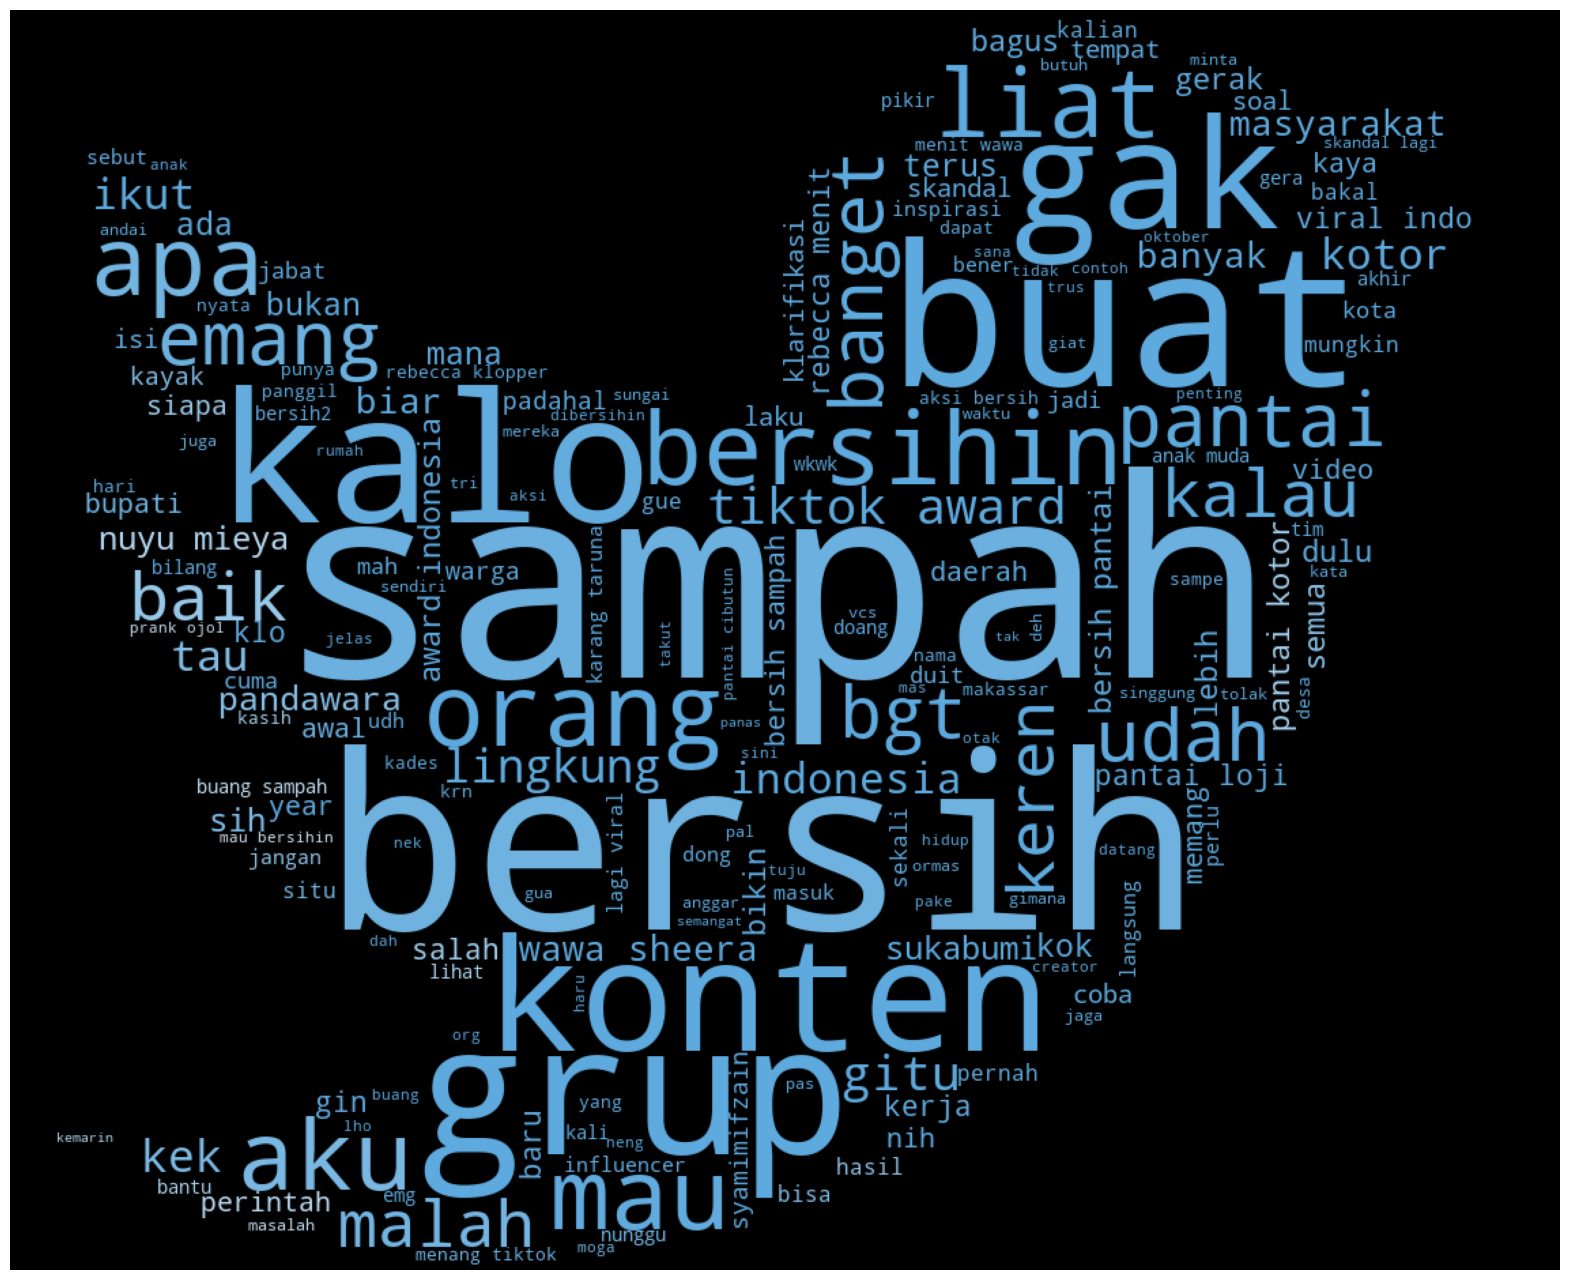

In [ ]:
cluster_0_words=' '.join(text for text in cluster_0['Tweet'])
wordcloud(cluster_0_words)


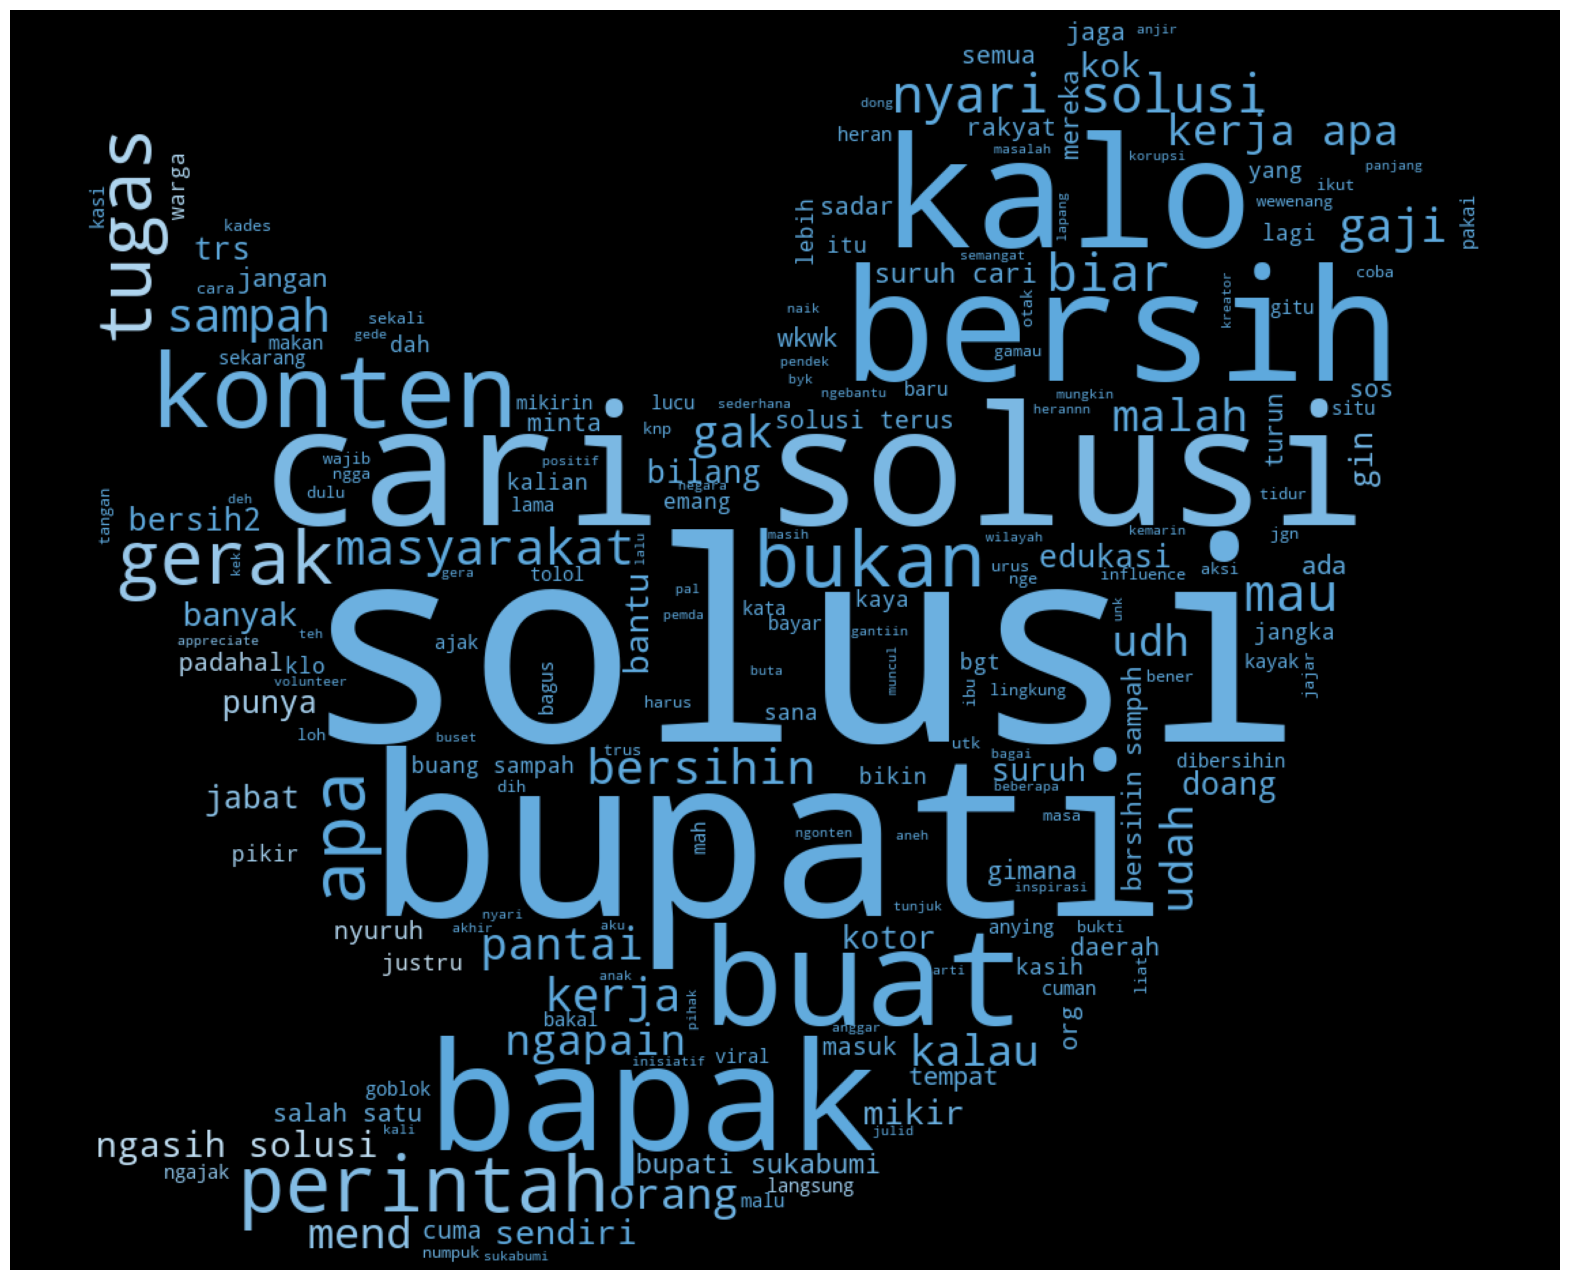

In [ ]:
cluster_1=frame[frame['Sentimen']==1]
cluster_1_words=' '.join(text for text in cluster_1['Tweet'])
wordcloud(cluster_1_words)